In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])
# Recreate a DatetimeIndex with a specific frequency

freq = 'D'  # Monthly frequency
date_rng = pd.date_range(start = start_date, end = end_date, freq = freq)

prices = np.sin(unix_dates)

for i in range(len(prices)):
    prices[i] = prices[i] + float(i) / 50

data = pd.DataFrame({'ds': date_rng, 'y': prices})
data.set_index('ds', inplace = True)

In [3]:
from prophet import Prophet

In [4]:
# Разделение данных на train и test
train_size = int(0.8 * len(data))  # 80% данных для обучения
train_data = data[:train_size]
test_data = data[train_size:]

In [5]:
# Создание и обучение модели Prophet
model = Prophet(daily_seasonality=False)  # Указываем, что у нас есть ежедневная сезонность
model.fit(train_data.reset_index())

01:55:38 - cmdstanpy - INFO - Chain [1] start processing
01:55:38 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Создание фрейма для прогнозирования
future = pd.DataFrame(index=test_data.index)
future['ds'] = test_data.index

In [7]:
# Получение прогнозов
forecast = model.predict(future)

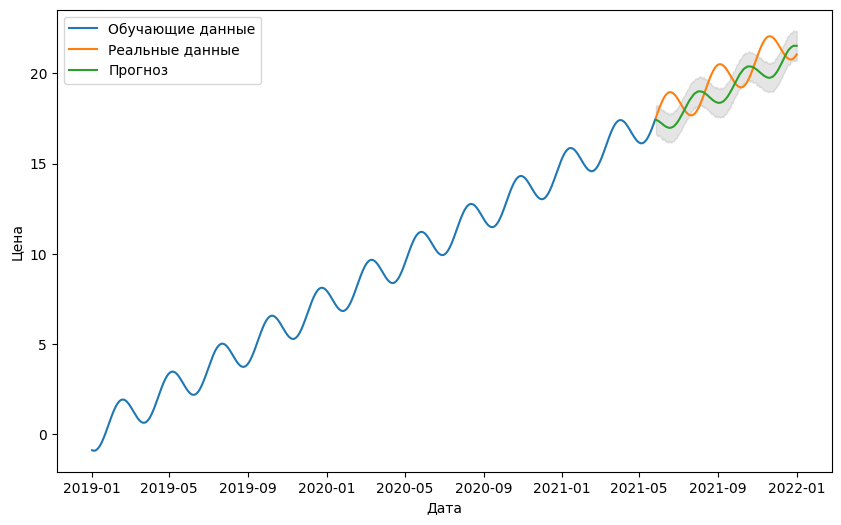

In [8]:
# Визуализация результатов
fig = plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['y'], label='Обучающие данные')
plt.plot(test_data.index, test_data['y'], label='Реальные данные')
plt.plot(test_data.index, forecast['yhat'], label='Прогноз')
plt.fill_between(test_data.index, forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()